In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Membaca dataset
df = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
X = df.drop(columns=["condition"])  # Semua fitur kecuali target
y = df["condition"]

In [6]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [22]:
# Membuat model RF
model = RandomForestClassifier(n_estimators=3, random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=3, random_state=42)

In [23]:
# Memprediksi data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")


Akurasi model: 79.89%


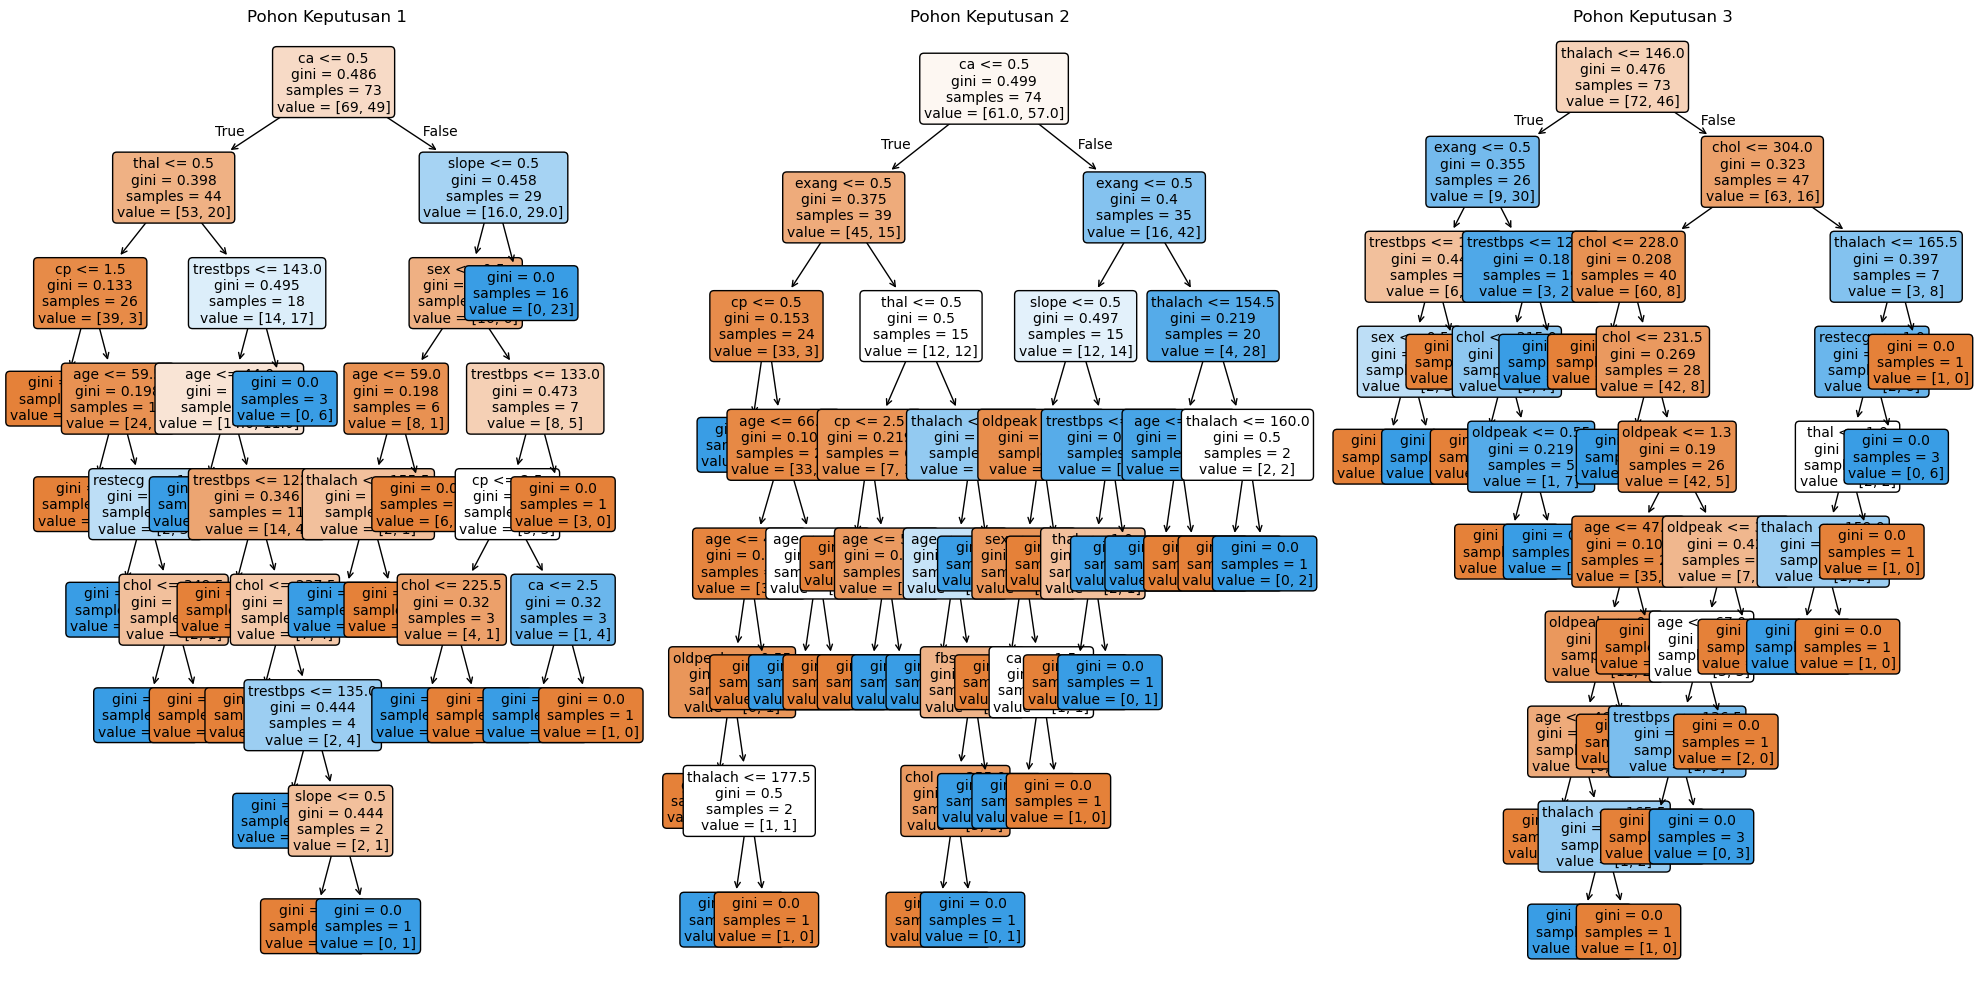

In [24]:
# Pilih tiga pohon dari Random Forest
n_trees = 3  # Jumlah pohon yang ingin ditampilkan
fig, axes = plt.subplots(nrows=1, ncols=n_trees, figsize=(20, 10))

for i in range(n_trees):
    tree_model = model.estimators_[i]
    plot_tree(tree_model, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10, ax=axes[i])
    axes[i].set_title(f"Pohon Keputusan {i+1}")

plt.tight_layout()
plt.show()